<a href="https://colab.research.google.com/github/qkrwogus0726/Test_Repo/blob/main/1021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

def step_func(x):
  return (x>=0)


x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0,1)
b = 1.0
w0 = 0.5
a = 0.1

for i in range(1000):
  error_sum = 0
  for j in range(4):
    output = step_func(np.sum(x[j]*w) + b*w0)
    error = y[j][0] - output
    w = w + x[j]*a*error
    error_sum += error
  if i % 50 == 0:
    print(i, error_sum)

print(step_func(-1))

for i in range(4):
  if step_func(np.sum(x[i]*w + b*w0) > 0.0):
    output = 1.0
  else:
    output = 0.0
    print("x: ", x[i], "y:", y[i], "output: ", step_func(np.sum(x[i]*w) + b*w0), "result :", output)

In [ ]:
import numpy as np
import tensorflow as tf

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0,1)

for i in range(1000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w) + b*w0)
    error = y[j][0]
    w = w + x[j] * a * error
    w0 = w0 + a * error
    error_sum += error

if i % 50 == 0:
  print(i, error_sum)

In [ ]:
import numpy as np
import tensorflow as tf

x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0],[1],[1], [0]])

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units = 2, input_dim = 2, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = tf.optimizers.SGD(learning_rate = 0.1), loss = 'mse')
model.summary()
history = model.fit(x,y,epochs= 3000, batch_size = 1)

print("=========weights==========")
for weight in model.weights:
  print(weight)

print("=========test results=======")
print(x)
print(model.predict(x))
print("============================")

In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
y_data = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1],
    [1,0,0],
    [1,0,0],
    [0,0,1]
])

model = Sequential()
model.add(Dense(input_dim = 2, units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 3,activation = 'softmax'))

print("==============initial weights")
for weight in model.weights:
  print(weight)

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01)
, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
history = model.fit(x_data, y_data, epochs = 100, batch_size = 1)

print('================weights================')
for weight in model.weights:
  print(weight)

print('================test results===========')
print(x_data)
print(model.predict(x_data))
print("\n Accuracy: %.4f" % (model.evaluate(x_data, y_data) [1]))
print("==========================================")

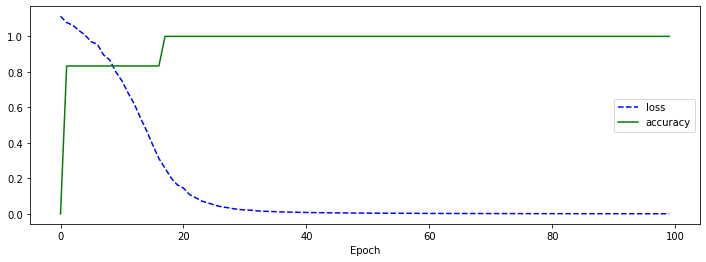

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))
plt.subplot(1,1,1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')

plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
import io
import pandas as pd
from google.colab import files

uploaded = files.upload()
filename = ''

for fn in uploaded.keys():
  print('User uploaded file "{name}" with {length} bytes'.format(name = fn, length = len(uploaded[fn])))
  filename = fn


da = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
print(da)

Saving data.csv to data (1).csv
User uploaded file "data.csv" with 92 bytes
   tire  wing  ship  car  plane
0     0     0     1    0      0
1     1     0     0    1      0
2     1     1     0    0      1
3     0     0     1    0      0
4     0     0     1    0      0
5     0     1     0    0      1


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


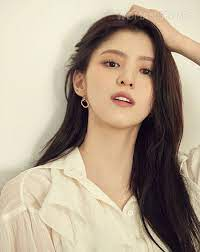

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
from google.colab import drive

drive.mount('/content/gdrive/')
img = cv2.imread('/content/gdrive/My Drive/download.jfif')
cv2_imshow(img)

In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

data = np.loadtxt('/content/gdrive/My Drive/python/data.csv', delimiter = ',', skiprows = 1, unpack = True, dtype = np.float32)
x_data = np.transpose(data[0:2])
y_data = np.transpose(data[2:])

model = tf.keras.Sequential()
model.add(Dense(input_dim = 2, units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()


#checkpoint_path = "/content/gdrive/My Drive/python/cp.ckpt"
#cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, verbose = 1)
#history = model.fit(x_data, y_data, epochs = 100, batch_size = 1, callbacks = [cp_callback])

model.load_weights(checkpoint_path)

loss, acc = model.evaluate(x_data, y_data, verbose = 2)
print("훈련된 모델의 정확도 : {:5.2f}%".format(100*acc))

print('================weights================')
for weight in model.weights:
  print(weight)

print('================test results===========')
print(x_data)
print(model.predict(x_data))
print("\n Accuracy: %.4f" % (model.evaluate(x_data, y_data) [1]))
print("==========================================")

In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

data = np.loadtxt('/content/gdrive/My Drive/python/data.csv', delimiter = ',', skiprows = 1, unpack = True, dtype = np.float32)
x_data = np.transpose(data[0:2])
y_data = np.transpose(data[2:])

model = tf.keras.Sequential()
model.add(Dense(input_dim = 2, units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
history = model.fit(x_data, y_data, epochs = 100, batch_size= 1)
model.save("/content/gdrive/My Drive/python/my_model.h5")

#checkpoint_path = "/content/gdrive/My Drive/python/cp.ckpt"
#cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, verbose = 1)
#history = model.fit(x_data, y_data, epochs = 100, batch_size = 1, callbacks = [cp_callback])

model.load_weights(checkpoint_path)

loss, acc = model.evaluate(x_data, y_data, verbose = 2)
print("훈련된 모델의 정확도 : {:5.2f}%".format(100*acc))

print('================weights================')
for weight in model.weights:
  print(weight)

print('================test results===========')
print(x_data)
print(model.predict(x_data))
print("\n Accuracy: %.4f" % (model.evaluate(x_data, y_data) [1]))
print("==========================================")

In [ ]:
import tensorflow as tf
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

x_data = np.array([[0,0], [1,0], [1,1], [0,0], [0,0], [0,1]])
y_data = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1],
    [1,0,0],
    [1,0,0],
    [0,0,1]
])

new_model = keras.models.load_model("/content/gdrive/My Drive/python/my_model.h5")
new_model.summary()

converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

with open("/content/gdrive/My Drive/python/model.tflite", 'wb') as f:
  f.write(tflite_model)

loss, acc = new_model.evaluate(x_data, y_data, verbose= 2)
print("정확도 : {:5.2f}%".format(100*acc))

In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

data = np.loadtxt('/content/gdrive/My Drive/python/Iris-training.csv', delimiter = ',', skiprows = 1, unpack = True, dtype = np.float32)
x_data = np.transpose(data[1:5])
y_data = np.transpose(data[5:8])

model = tf.keras.Sequential()
model.add(Dense(input_dim = 4, units = 10, activation = 'relu'))
model.add(Dense(units = 20, activation = 'sigmoid'))
model.add(Dense(units = 10, activation = 'sigmoid'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
history = model.fit(x_data, y_data, epochs = 80, batch_size= 10)
model.save("/content/gdrive/My Drive/python/my_model.h5")

model.load_weights("/content/gdrive/My Drive/python/my_model.h5")

loss, acc = model.evaluate(x_data, y_data, verbose = 2)
print("훈련된 모델의 정확도 : {:5.2f}%".format(100*acc))


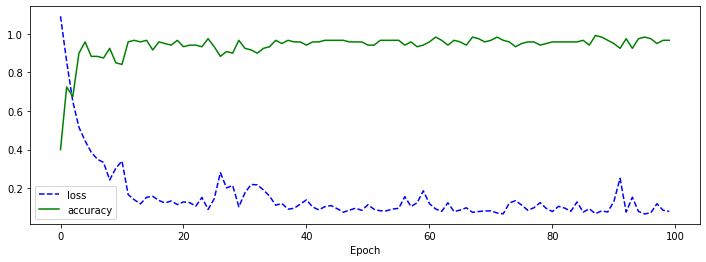

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))
plt.subplot(1,1,1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')

plt.xlabel('Epoch')
plt.legend()
plt.show()

11490434/11490434 [==============================] - 0s 0us/step


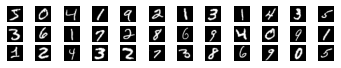

In [ ]:
import tensorflow as tf
import matplotlib.pylab as plt

(train_images,train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

plt.figure(figsize=(6,1))
for i in range(36):
  plt.subplot(3, 12, i+1)
  plt.imshow(train_images[i], cmap = 'gray')
  plt.axis('off')
plt.show()